In [1]:
import numpy as np
import os
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12
import warnings
warnings.filterwarnings(action="ignore", message="^internal gelsd")

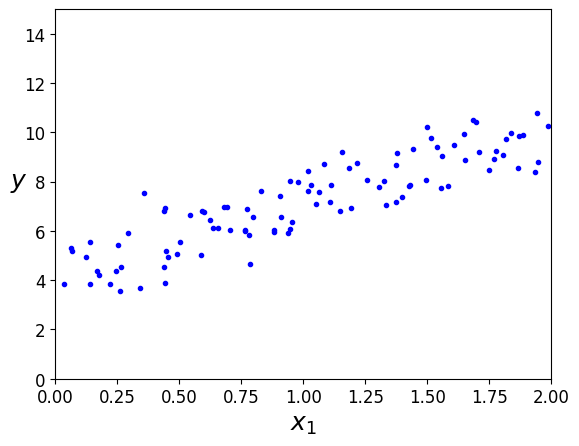

In [2]:
X = 2 * np.random.rand(100, 1)
y = 4 + 3 * X + np.random.randn(100, 1) # y = 4 + 3x + Gaussian noise
#plot
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

In [3]:
X_b = np.c_[np.ones((100, 1)), X] # add x0 = 1 to each instance
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
print("theta_best = ", theta_best)


theta_best =  [[4.22771101]
 [2.93680194]]


In [4]:
X_new = np.array([[0], [2]])
X_new_b = np.c_[np.ones((2, 1)), X_new] # add x0 = 1 to each instance
y_predict = X_new_b.dot(theta_best)
print("y_predict = ", y_predict)

y_predict =  [[ 4.22771101]
 [10.10131489]]


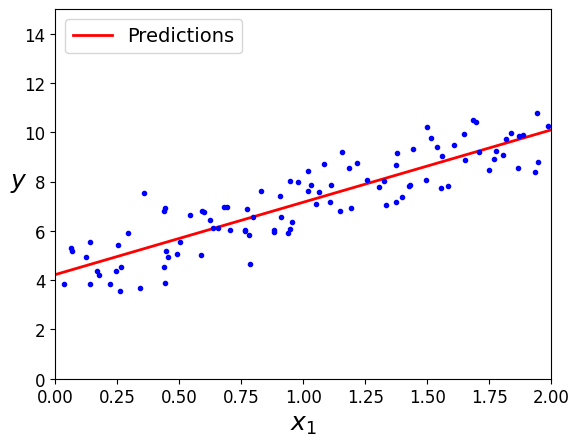

In [5]:
#plot
plt.plot(X_new, y_predict, "r-", linewidth=2, label="Predictions")
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([0, 2, 0, 15])
plt.show()

In [6]:
from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
print("lin_reg.intercept_ = ", lin_reg.intercept_)
print("lin_reg.coef_ = ", lin_reg.coef_)

lin_reg.intercept_ =  [4.22771101]
lin_reg.coef_ =  [[2.93680194]]


In [7]:
#predict X_new
print("lin_reg.predict(X_new) = ", lin_reg.predict(X_new))

lin_reg.predict(X_new) =  [[ 4.22771101]
 [10.10131489]]


In [8]:
theta_best_svd, residuals, rank, s = np.linalg.lstsq(X_b, y, rcond=1e-6)
print("theta_best_svd = ", theta_best_svd)


theta_best_svd =  [[4.22771101]
 [2.93680194]]


In [9]:
np.linalg.pinv(X_b).dot(y)

array([[4.22771101],
       [2.93680194]])

#### Linear regression using batch gradient descent

In [10]:
eta = 0.1 # learning rate
n_iterations = 1000
m = 100
theta = np.random.randn(2,1) # random initialization

for iteration in range(n_iterations):
    gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - eta * gradients

print("theta = ", theta)

theta =  [[4.22771101]
 [2.93680194]]


In [11]:
X_new_b.dot(theta)

array([[ 4.22771101],
       [10.10131489]])

In [12]:
theta_path_bgd = []
def plot_gradient_descent(theta, eta, theta_path=None):
    m = len(X_b)
    plt.plot(X, y, "b.")
    n_iterations = 1000
    for iteration in range(n_iterations):
        if iteration < 10:
            y_predict = X_new_b.dot(theta)
            style = "b-" if iteration > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        gradients = 2/m * X_b.T.dot(X_b.dot(theta) - y)
        theta = theta - eta * gradients
        if theta_path is not None:
            theta_path.append(theta)
    plt.xlabel("$x_1$", fontsize=18)
    plt.axis([0, 2, 0, 15])
    plt.title(r"$\eta = {}$".format(eta), fontsize=16)

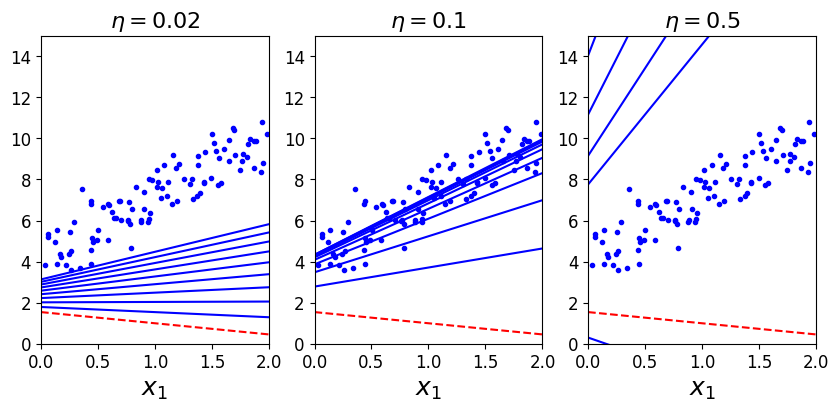

In [13]:
theta = np.random.randn(2,1) # random initialization
plt.figure(figsize=(10,4))
plt.subplot(131); plot_gradient_descent(theta, eta=0.02)
plt.subplot(132); plot_gradient_descent(theta, eta=0.1, theta_path=theta_path_bgd)
plt.subplot(133); plot_gradient_descent(theta, eta=0.5)
plt.show()

#### Stocaistic gradient descent

In [14]:
theta_path_sgd = []
m = len(X_b)
np.random.seed(42)


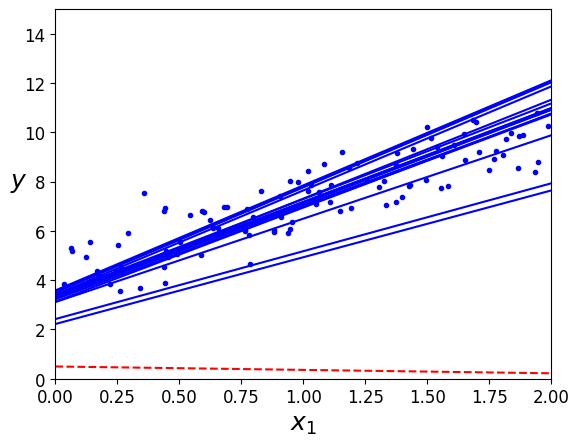

In [15]:
n_epochs = 50
t0, t1 = 5, 50 # learning schedule hyperparameters
def learning_schedule(t):
    return t0 / (t + t1)
theta = np.random.randn(2,1) # random initialization

for epoch in range(n_epochs):
    for i in range(m):
        if epoch ==0 and i < 20:
            y_predict = X_new_b.dot(theta)
            style = "b-" if i > 0 else "r--"
            plt.plot(X_new, y_predict, style)
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(epoch * m + i)
        theta = theta - eta * gradients
        theta_path_sgd.append(theta)
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([0, 2, 0, 15])
plt.show()

#### Mini-batch gradient descent

In [16]:
theta_path_mgd = []
n_iterations = 50
minibatch_size = 20
np.random.seed(42)
theta = np.random.randn(2,1) # random initialization
t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)
t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0,m,minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
print("theta = ", theta)

theta =  [[4.27284359]
 [2.96610664]]


In [17]:
theta_path_bgd = np.array(theta_path_bgd)
theta_path_sgd = np.array(theta_path_sgd)
theta_path_mgd = np.array(theta_path_mgd)

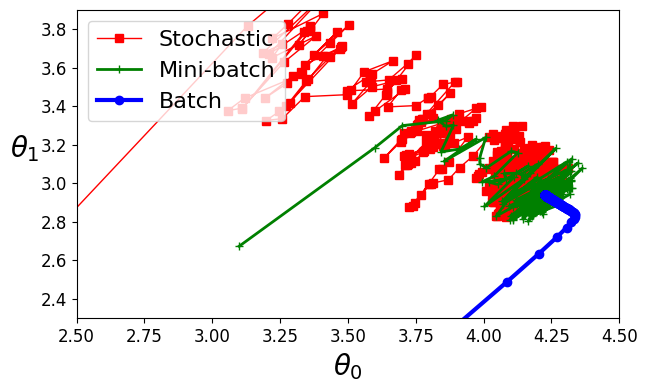

In [18]:
#plot
plt.figure(figsize=(7,4))
plt.plot(theta_path_sgd[:, 0], theta_path_sgd[:, 1], "r-s", linewidth=1, label="Stochastic")
plt.plot(theta_path_mgd[:, 0], theta_path_mgd[:, 1], "g-+", linewidth=2, label="Mini-batch")
plt.plot(theta_path_bgd[:, 0], theta_path_bgd[:, 1], "b-o", linewidth=3, label="Batch")
plt.legend(loc="upper left", fontsize=16)
plt.xlabel(r"$\theta_0$", fontsize=20)
plt.ylabel(r"$\theta_1$   ", fontsize=20, rotation=0)
plt.axis([2.5, 4.5, 2.3, 3.9])
plt.show()


#### Polynomial regression

In [19]:
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m,1)

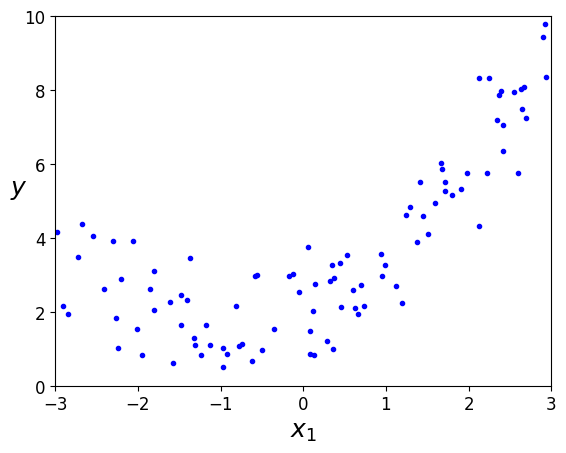

In [20]:
#plot
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
poly_features = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly_features.fit_transform(X)
print("X[0] = ", X[0])

X[0] =  [2.38942838]


In [22]:
X_poly[0]

array([2.38942838, 5.709368  ])

In [23]:
lin_reg = LinearRegression()
lin_reg.fit(X_poly, y)
print("lin_reg.intercept_ = ", lin_reg.intercept_)
print("lin_reg.coef_ = ", lin_reg.coef_)

lin_reg.intercept_ =  [1.9735233]
lin_reg.coef_ =  [[0.95038538 0.52577032]]


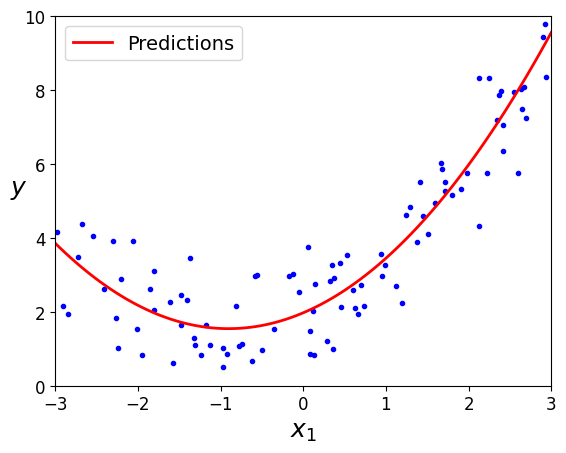

In [24]:
#plot
X_new=np.linspace(-3,3,100).reshape(100,1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X,y,"b.")
plt.plot(X_new,y_new,"r-",linewidth=2,label="Predictions")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.legend(loc="upper left",fontsize=14)
plt.axis([-3,3,0,10])
plt.show()

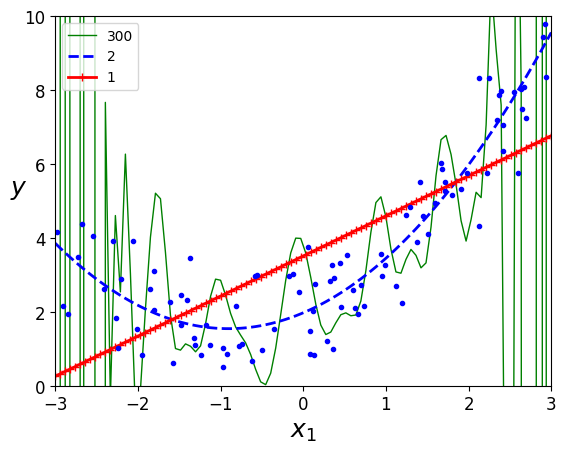

In [25]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
for style,width,degree in (("g-",1,300),("b--",2,2),("r-+",2,1)):
    polybig_features = PolynomialFeatures(degree=degree,include_bias=False)
    std_scaler = StandardScaler()
    lin_reg = LinearRegression()
    polynomial_regression = Pipeline([
        ("poly_features",polybig_features),
        ("std_scaler",std_scaler),
        ("lin_reg",lin_reg),
    ])
    polynomial_regression.fit(X,y)
    y_newbig = polynomial_regression.predict(X_new)
    plt.plot(X_new,y_newbig,style,label=str(degree),linewidth=width)
plt.plot(X,y,"b.",linewidth=3)
plt.legend(loc="upper left")
plt.xlabel("$x_1$",fontsize=18)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.axis([-3,3,0,10])
plt.show()

In [26]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model,X,y):
    X_train,X_val,y_train,y_val = train_test_split(X,y,test_size=0.2,random_state=10)
    train_errors,val_errors = [],[]
    for m in range(1,len(X_train)):
        model.fit(X_train[:m],y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train_predict,y_train[:m]))
        val_errors.append(mean_squared_error(y_val_predict,y_val))
    plt.plot(np.sqrt(train_errors),"r-+",linewidth=2,label="train")
    plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="val")
    plt.legend(loc="upper right",fontsize=14)
    plt.xlabel("Training set size",fontsize=14)
    plt.ylabel("RMSE",fontsize=14)

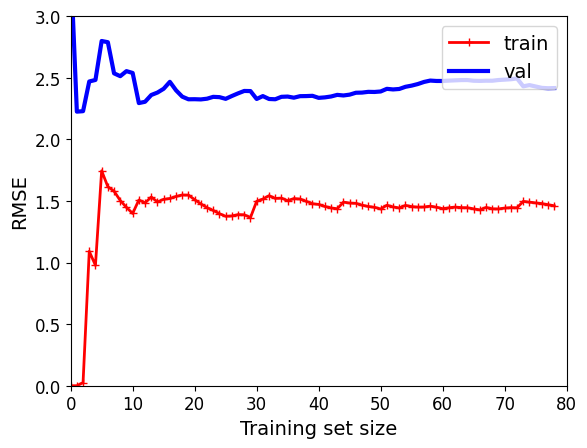

In [27]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg,X,y)
plt.axis([0,80,0,3])
plt.show()

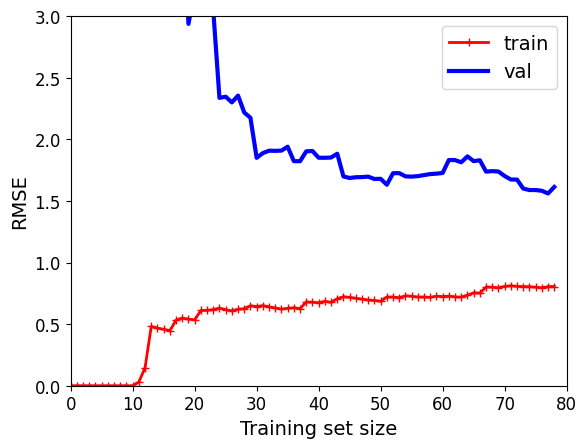

In [28]:
from sklearn.pipeline import Pipeline
polynomial_regression = Pipeline([
    ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
    ("lin_reg",LinearRegression()),
])
plot_learning_curves(polynomial_regression,X,y)
plt.axis([0,80,0,3])
plt.show()

#### Regularized models

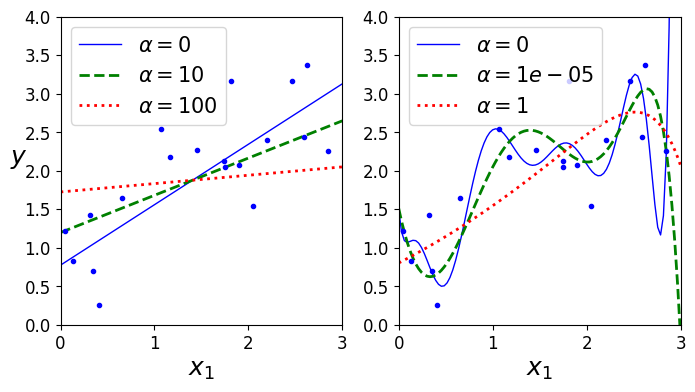

In [29]:
from sklearn.linear_model import Ridge
m=20
X=3*np.random.rand(m,1)
y=1+0.5*X+np.random.randn(m,1)/1.5
X_new = np.linspace(0,3,100).reshape(100,1)

def plot_model(model_class,polynomial,alphas,**model_kargs):
    for alpha,style in zip(alphas,("b-","g--","r:")):
        model = model_class(alpha,**model_kargs) if alpha>0 else LinearRegression()
        if polynomial:
            model = Pipeline([
                ("poly_features",PolynomialFeatures(degree=10,include_bias=False)),
                ("std_scaler",StandardScaler()),
                ("regul_reg",model),
            ])
        model.fit(X,y)
        y_new_regul = model.predict(X_new)
        lw = 2 if alpha>0 else 1
        plt.plot(X_new,y_new_regul,style,linewidth=lw,label=r"$\alpha = {}$".format(alpha))
    plt.plot(X,y,"b.",linewidth=3)
    plt.legend(loc="upper left",fontsize=15)
    plt.xlabel("$x_1$",fontsize=18)
    plt.axis([0,3,0,4])

plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Ridge,polynomial=False,alphas=(0,10,100),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Ridge,polynomial=True,alphas=(0,10**-5,1),random_state=42)
plt.show()

In [30]:
from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1,solver="cholesky",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.94673854]])

In [32]:
#import SGDRegressor
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(penalty="l2",random_state=42)
sgd_reg.fit(X,y.ravel())
sgd_reg.predict([[1.5]])

array([1.88940307])

In [33]:
ridge_reg = Ridge(alpha=1,solver="sag",random_state=42)
ridge_reg.fit(X,y)
ridge_reg.predict([[1.5]])

array([[1.94687604]])

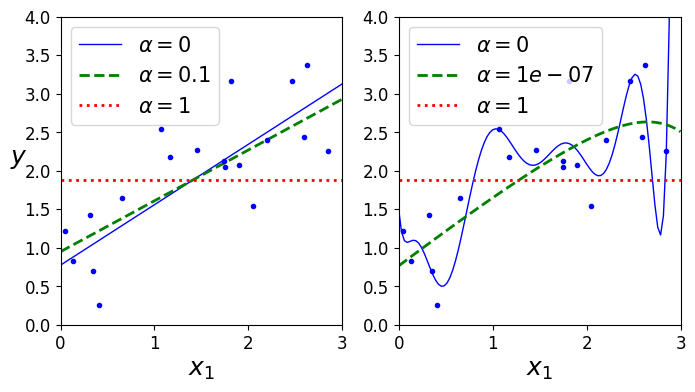

In [34]:
from sklearn.linear_model import Lasso
plt.figure(figsize=(8,4))
plt.subplot(121)
plot_model(Lasso,polynomial=False,alphas=(0,0.1,1),random_state=42)
plt.ylabel("$y$",rotation=0,fontsize=18)
plt.subplot(122)
plot_model(Lasso,polynomial=True,alphas=(0,10**-7,1),tol=1,random_state=42)
plt.show()

In [35]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1,l1_ratio=0.5,random_state=42)
elastic_net.fit(X,y)
elastic_net.predict([[1.5]])

array([1.94117801])

C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(
C:\Users\didit\AppData\Roaming\Python\Python311\site-packages\sklearn\linear_model\_stochastic_gradient.py:1548: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fi

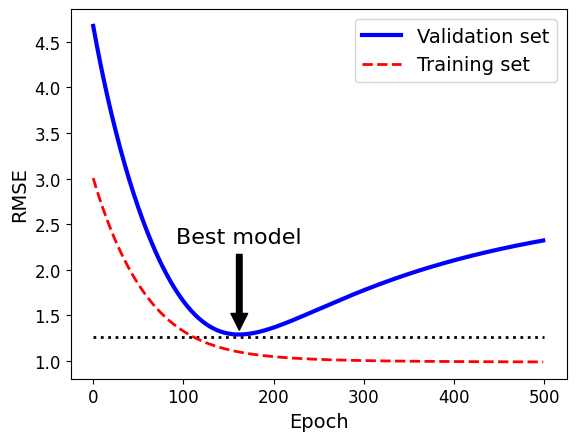

In [50]:
m=100
X=6*np.random.rand(m,1)-3
y=2+X+0.5*X**2+np.random.randn(m,1)

X_train, X_val, y_train, y_val = train_test_split(X[:50],y[:50].ravel(),test_size=0.5,random_state=10)

poly_scaler = Pipeline([
    ("poly_features",PolynomialFeatures(degree=90,include_bias=False)),
    ("std_scaler",StandardScaler()),
])
X_train_poly_scaled = poly_scaler.fit_transform(X_train)
X_val_poly_scaled = poly_scaler.transform(X_val)

sgd_reg = SGDRegressor(max_iter=1,tol=0.001,warm_start=True,penalty=None,learning_rate="constant",eta0=0.0005,random_state=42)

n_epochs = 500
train_errors, val_errors = [],[]
for epoch in range(n_epochs):
    sgd_reg.fit(X_train_poly_scaled,y_train)
    y_train_predict = sgd_reg.predict(X_train_poly_scaled)
    y_val_predict = sgd_reg.predict(X_val_poly_scaled)
    train_errors.append(mean_squared_error(y_train_predict,y_train))
    val_errors.append(mean_squared_error(y_val_predict,y_val))

best_epoch = np.argmin(val_errors)
best_val_rmse = np.sqrt(val_errors[best_epoch])
#plot
plt.annotate("Best model",
                xy=(best_epoch,best_val_rmse),
                xytext=(best_epoch,best_val_rmse+1),
                ha="center",
                arrowprops=dict(facecolor="black",shrink=0.05),
                fontsize=16,
            )
best_val_rmse -= 0.03
plt.plot([0,n_epochs],[best_val_rmse,best_val_rmse],"k:",linewidth=2)
plt.plot(np.sqrt(val_errors),"b-",linewidth=3,label="Validation set")
plt.plot(np.sqrt(train_errors),"r--",linewidth=2,label="Training set")
plt.legend(loc="upper right",fontsize=14)
plt.xlabel("Epoch",fontsize=14)
plt.ylabel("RMSE",fontsize=14)
plt.show()

#### Logistic regression

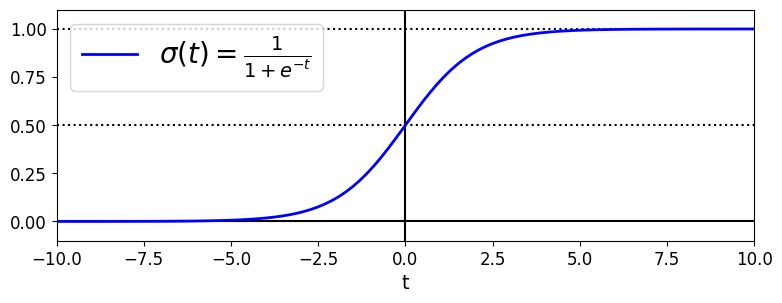

In [51]:
t = np.linspace(-10,10,100)
sig = 1/(1+np.exp(-t))
plt.figure(figsize=(9,3))
plt.plot([-10,10],[0,0],"k-")
plt.plot([-10,10],[0.5,0.5],"k:")
plt.plot([-10,10],[1,1],"k:")
plt.plot([0,0],[-1.1,1.1],"k-")
plt.plot(t,sig,"b-",linewidth=2,label=r"$\sigma(t) = \frac{1}{1+e^{-t}}$")
plt.xlabel("t")
plt.legend(loc="upper left",fontsize=20)
plt.axis([-10,10,-0.1,1.1])
plt.show()

In [52]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data',
 'target',
 'frame',
 'target_names',
 'DESCR',
 'feature_names',
 'filename',
 'data_module']

In [53]:
print(iris.DESCR)

.. _iris_dataset:

Iris plants dataset
--------------------

**Data Set Characteristics:**

    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
                
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20   0.76    0.9565  (high!)
    ============== ==== ==== ======= ===== ===========

In [55]:
#feature engineering
X = iris["data"][:,3:]
y = (iris["target"]==2).astype(np.int16)

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(solver="liblinear",random_state=42)
log_reg.fit(X,y)

LogisticRegression(random_state=42, solver='liblinear')

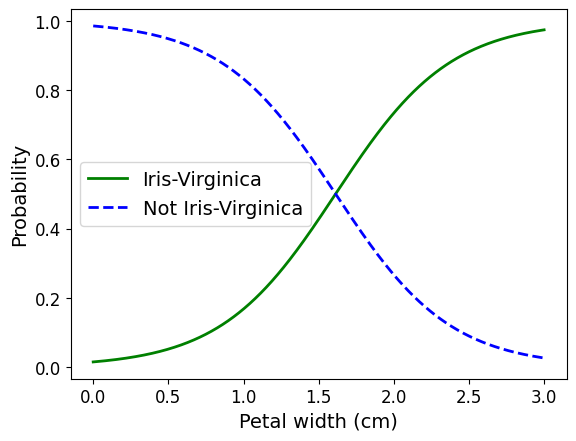

In [58]:
X_new = np.linspace(0,3,1000).reshape(-1,1)
y_proba = log_reg.predict_proba(X_new)  
#plot
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2,label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2,label="Not Iris-Virginica")
plt.legend(loc="center left",fontsize=14)
plt.xlabel("Petal width (cm)",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.show()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (2,) + inhomogeneous part.

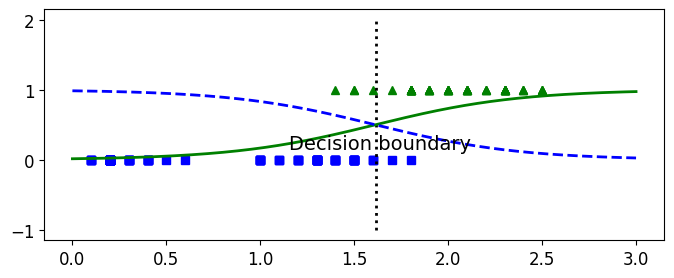

In [61]:
#plot with decision boundary>=0.5
decision_boundary = X_new[y_proba[:,1]>=0.5][0]
plt.figure(figsize=(8,3))
plt.plot(X[y==0],y[y==0],"bs")
plt.plot(X[y==1],y[y==1],"g^")
plt.plot([decision_boundary,decision_boundary],[-1,2],"k:",linewidth=2)
plt.plot(X_new,y_proba[:,1],"g-",linewidth=2,label="Iris-Virginica")
plt.plot(X_new,y_proba[:,0],"b--",linewidth=2,label="Not Iris-Virginica")
plt.text(decision_boundary+0.02,0.15,"Decision boundary",fontsize=14,color="k",ha="center")
plt.arrow(decision_boundary,0.03,-0.3,0,head_width=0.05,head_length=0.1,fc="b",ec="b")
plt.arrow(decision_boundary,0.97,0.3,0,head_width=0.05,head_length=0.1,fc="g",ec="g")
plt.xlabel("Petal width (cm)",fontsize=14)
plt.ylabel("Probability",fontsize=14)
plt.legend(loc="center left",fontsize=14)
plt.axis([0,3,-0.02,1.02])
plt.show()

In [63]:
decision_boundary


array([1.61561562])

In [64]:
#check for accuracy of logistic regression
from sklearn.linear_model import LogisticRegression
X = iris["data"][:,(2,3)]
y = (iris["target"]==2).astype(np.int16)
log_reg = LogisticRegression(solver="liblinear",C=10**10,random_state=42)
log_reg.fit(X,y)
log_reg.predict([[5,2]])
log_reg.predict_proba([[5,2]])


array([[0.01221471, 0.98778529]])

the accuracy of the model is : 96.0%


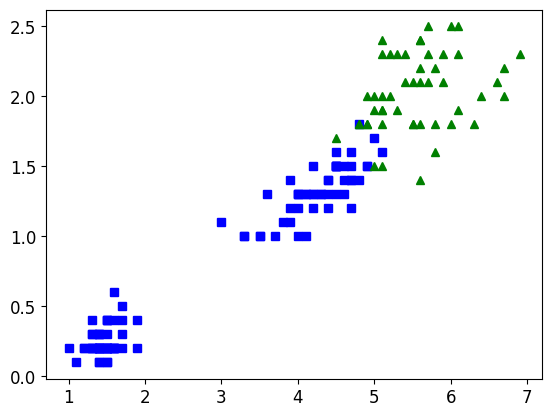

In [69]:
from sklearn.metrics import accuracy_score
X_new = iris["data"][:,(2,3)]
y_pred = log_reg.predict(X_new)
print(f"the accuracy of the model is : {accuracy_score(y,y_pred)*100}%")
#plot the accuracy
plt.plot(X[y==0,0],X[y==0,1],"bs")
plt.plot(X[y==1,0],X[y==1,1],"g^")
plt.show()
